# 주성분 분석 PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')

In [2]:
fruits_2d = fruits.reshape(-1,100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


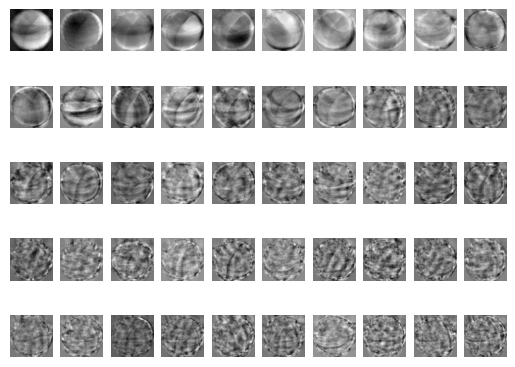

In [4]:
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(pca.components_[i].reshape(100,100), cmap='gray_r')
    plt.axis('off')

In [5]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [6]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [7]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

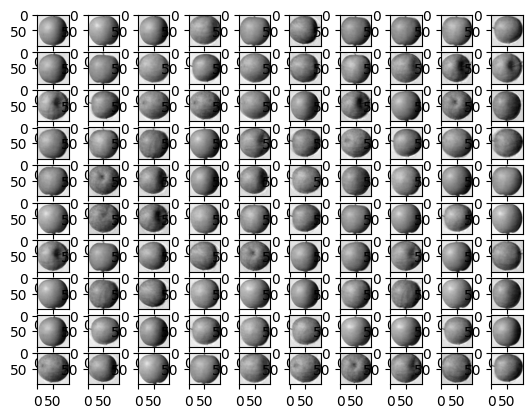

In [11]:
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(fruits_inverse[i].reshape(100,100),cmap='gray_r')

In [13]:
np.sum(pca.explained_variance_ratio_)

0.9215456557635625

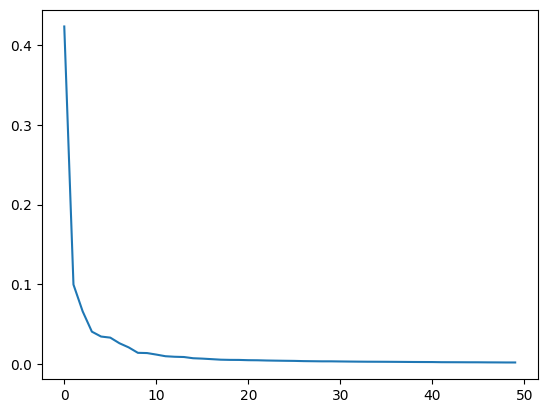

In [14]:
plt.plot(pca.explained_variance_ratio_)

# 분류기와 함께 사용하기

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))

0.9966666666666667 0.5919732093811035


In [17]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(1.0, 0.01510915756225586)

In [18]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

2

In [19]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [20]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

(0.9933333333333334, 0.020076560974121093)

### 차원 축소된 데이터를 가지고 KMeans를 이용해서 클러스터를 찾아보자

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit(fruits_pca)
km.labels_

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

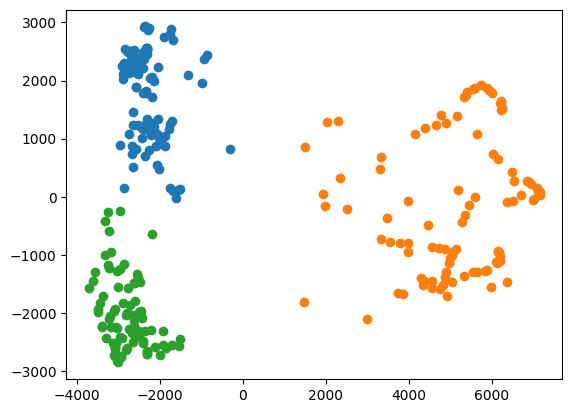

In [25]:
plt.scatter(fruits_pca[km.labels_==0][:,0], fruits_pca[km.labels_==0][:,1])
plt.scatter(fruits_pca[km.labels_==1][:,0], fruits_pca[km.labels_==1][:,1])
plt.scatter(fruits_pca[km.labels_==2][:,0], fruits_pca[km.labels_==2][:,1])

# 로또

In [30]:
import pandas as pd
df = pd.read_excel('lotto.xlsx', header=2)
df = df.iloc[:, -7:-1]
df.head()

,1,2,3,4,5,6
0,14,19,27,28,30,45
1,22,26,29,30,34,45
2,5,17,26,27,35,38
3,21,26,30,32,33,35
4,6,12,31,35,38,43


In [32]:
reverse_index = np.array(range(1054))[::-1]
lotto_df = df.iloc[reverse_index,:]

In [33]:
lotto_df = lotto_df.reset_index(drop=True)

In [34]:
lotto_df.loc[1054] = [4,7,12,14,22,33]
lotto_df.tail()

,1,2,3,4,5,6
1050,21,26,30,32,33,35
1051,5,17,26,27,35,38
1052,22,26,29,30,34,45
1053,14,19,27,28,30,45
1054,4,7,12,14,22,33


In [35]:
windows = 5
lotto_1 = lotto_df.loc[:,1].to_numpy()
print(lotto_1[:windows], lotto_1[windows])
print(lotto_1[1:windows+1], lotto_1[windows+1])

[10  9 11 14 16] 14
[ 9 11 14 16 14] 2


In [36]:
lotto_1_train = []
lotto_1_target = []
for i in range(len(lotto_df)):
    if windows+i <= len(lotto_df)-1:
        lotto_1_train.append(lotto_1[i:windows+i])
        lotto_1_target.append(lotto_1[windows+i])

In [42]:
def makeNumbers(number):
    lotto_train = []
    lotto_target = []
    lotto = lotto_df.loc[:,number].to_numpy()
    for i in range(len(lotto_df)):
        if windows+i <= len(lotto_df)-1:
            lotto_train.append(lotto[i:windows+i])
            lotto_target.append(lotto[windows+i])
    return lotto_train, lotto_target

In [43]:
makeNumbers(1)

([array([10,  9, 11, 14, 16], dtype=int64),
  array([ 9, 11, 14, 16, 14], dtype=int64),
  array([11, 14, 16, 14,  2], dtype=int64),
  array([14, 16, 14,  2,  8], dtype=int64),
  array([16, 14,  2,  8,  2], dtype=int64),
  array([14,  2,  8,  2,  9], dtype=int64),
  array([2, 8, 2, 9, 1], dtype=int64),
  array([8, 2, 9, 1, 2], dtype=int64),
  array([ 2,  9,  1,  2, 22], dtype=int64),
  array([ 9,  1,  2, 22,  2], dtype=int64),
  array([ 1,  2, 22,  2,  3], dtype=int64),
  array([ 2, 22,  2,  3,  6], dtype=int64),
  array([22,  2,  3,  6,  3], dtype=int64),
  array([2, 3, 6, 3, 3], dtype=int64),
  array([3, 6, 3, 3, 6], dtype=int64),
  array([ 6,  3,  3,  6, 10], dtype=int64),
  array([ 3,  3,  6, 10,  6], dtype=int64),
  array([ 3,  6, 10,  6,  4], dtype=int64),
  array([ 6, 10,  6,  4,  5], dtype=int64),
  array([10,  6,  4,  5,  7], dtype=int64),
  array([6, 4, 5, 7, 2], dtype=int64),
  array([4, 5, 7, 2, 4], dtype=int64),
  array([5, 7, 2, 4, 1], dtype=int64),
  array([7, 2, 4, 1, 9]

In [44]:
lotto_df = pd.read_csv('current_lotto.csv')

In [45]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()

In [46]:
# lotto_df.tail().loc[:,'1'].to_numpy()
train, target = makeNumbers('1')

In [47]:
xgbr.fit(train, target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
predict_data = lotto_df.tail().loc[:,'1'].to_numpy()
xgbr.predict([predict_data])

array([1.2738231], dtype=float32)

In [50]:
for i in ['1','2','3','4','5','6']:
    xgbr = XGBRegressor(random_state=0)
    train, target = makeNumbers(i)
    xgbr.fit(train, target)
    predict_data = lotto_df.tail(windows).loc[:,i].to_numpy()
    print(np.round(xgbr.predict([predict_data])))

[1.]
[12.]
[18.]
[26.]
[26.]
[42.]
